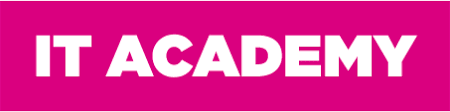

<div class="alert alert-block alert-info"><font size="5"><center><b><u>Lliurament tasca 6A - Exercici 3</u></b></center></font>

\begin{align*}Cristiane\:de Souza\end{align*}
\begin{align*}Business\hspace{2mm}Intelligence\hspace{2mm}and\hspace{2mm}Data\hspace{2mm}Scientist\hspace{2mm}Project\hspace{2mm}Integrator\end{align*}
$%$       
\begin{align*}Date : Febrer\hspace{2mm}2021\end{align*}</div>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mcabecera = ['movie_id', 'titulo', 'genero']
mcabecera

['movie_id', 'titulo', 'genero']

In [3]:
movies = pd.read_table('movies.dat', sep = '::', names = mcabecera, header = None ,engine='python')
movies.head()

,movie_id,titulo,genero
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movies.shape

(3883, 3)

In [5]:
movies.describe()

,movie_id
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


### Dummy Variables

In [6]:
# Cleanning the '|' of the genero

cleaned = movies.set_index(['movie_id','titulo']).genero.str.split('|', expand=True).stack()
cleaned.head(10)

movie_id  titulo                     
1         Toy Story (1995)          0     Animation
                                    1    Children's
                                    2        Comedy
2         Jumanji (1995)            0     Adventure
                                    1    Children's
                                    2       Fantasy
3         Grumpier Old Men (1995)   0        Comedy
                                    1       Romance
4         Waiting to Exhale (1995)  0        Comedy
                                    1         Drama
dtype: object

In [7]:
dummies = pd.get_dummies(cleaned).groupby(['movie_id','titulo']).sum()

movies_dummies = pd.get_dummies(cleaned,prefix='Genero').groupby(['movie_id','titulo']).sum().reset_index()
movies_dummies.head()

,movie_id,titulo,Genero_Action,Genero_Adventure,Genero_Animation,Genero_Children's,Genero_Comedy,Genero_Crime,Genero_Documentary,Genero_Drama,Genero_Fantasy,Genero_Film-Noir,Genero_Horror,Genero_Musical,Genero_Mystery,Genero_Romance,Genero_Sci-Fi,Genero_Thriller,Genero_War,Genero_Western
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
movies_dummies['year'] = movies_dummies.titulo.str.extract('\((\d{4})\)', expand=False)
movies_dummies

,movie_id,titulo,Genero_Action,Genero_Adventure,Genero_Animation,Genero_Children's,Genero_Comedy,Genero_Crime,Genero_Documentary,Genero_Drama,...,Genero_Film-Noir,Genero_Horror,Genero_Musical,Genero_Mystery,Genero_Romance,Genero_Sci-Fi,Genero_Thriller,Genero_War,Genero_Western,year
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1995
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1995
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2000
3879,3949,Requiem for a Dream (2000),0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2000
3880,3950,Tigerland (2000),0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2000
3881,3951,Two Family House (2000),0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2000


In [9]:
movies_dummies['year'].unique()

array(['1995', '1994', '1996', '1976', '1993', '1992', '1988', '1967',
       '1964', '1977', '1965', '1982', '1962', '1990', '1991', '1989',
       '1937', '1940', '1969', '1981', '1973', '1970', '1960', '1955',
       '1956', '1959', '1968', '1980', '1975', '1986', '1948', '1943',
       '1963', '1950', '1946', '1987', '1997', '1974', '1958', '1949',
       '1972', '1998', '1933', '1952', '1951', '1957', '1961', '1954',
       '1934', '1944', '1942', '1941', '1953', '1939', '1947', '1945',
       '1938', '1935', '1936', '1926', '1932', '1930', '1971', '1979',
       '1966', '1978', '1985', '1983', '1984', '1931', '1922', '1927',
       '1929', '1928', '1925', '1923', '1999', '1919', '2000', '1920',
       '1921'], dtype=object)

In [10]:
movies_dummies['year'].nunique()

81

In [11]:
movies_dummies.columns

Index(['movie_id', 'titulo', 'Genero_Action', 'Genero_Adventure',
       'Genero_Animation', 'Genero_Children's', 'Genero_Comedy',
       'Genero_Crime', 'Genero_Documentary', 'Genero_Drama', 'Genero_Fantasy',
       'Genero_Film-Noir', 'Genero_Horror', 'Genero_Musical', 'Genero_Mystery',
       'Genero_Romance', 'Genero_Sci-Fi', 'Genero_Thriller', 'Genero_War',
       'Genero_Western', 'year'],
      dtype='object')

In [12]:
gen_year = movies_dummies.drop(['movie_id', 'titulo'], axis=1)

gen_year

,Genero_Action,Genero_Adventure,Genero_Animation,Genero_Children's,Genero_Comedy,Genero_Crime,Genero_Documentary,Genero_Drama,Genero_Fantasy,Genero_Film-Noir,Genero_Horror,Genero_Musical,Genero_Mystery,Genero_Romance,Genero_Sci-Fi,Genero_Thriller,Genero_War,Genero_Western,year
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1995
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1995
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1995
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1995
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2000
3879,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2000
3880,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2000
3881,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2000


In [13]:
gen_year = gen_year.groupby(by=["year"]).sum()
gen_year

,Genero_Action,Genero_Adventure,Genero_Animation,Genero_Children's,Genero_Comedy,Genero_Crime,Genero_Documentary,Genero_Drama,Genero_Fantasy,Genero_Film-Noir,Genero_Horror,Genero_Musical,Genero_Mystery,Genero_Romance,Genero_Sci-Fi,Genero_Thriller,Genero_War,Genero_Western
year,,,,,,,,,,,,,,,,,,
1919,1,1,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0
1920,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
1921,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1922,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
1923,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,37,22,7,20,115,23,19,150,5,2,12,7,6,48,14,45,8,1
1997,43,22,6,22,98,26,11,139,6,2,10,5,15,52,18,55,10,0
1998,44,16,8,18,112,25,18,166,2,3,15,3,10,58,17,51,5,1


##  Films Genres Quantity

In [14]:
gen_quant =pd.DataFrame((movies_dummies.iloc[:,2:20]).sum().sort_values())
gen_quant

,0
Genero_Film-Noir,44
Genero_Fantasy,68
Genero_Western,68
Genero_Animation,105
Genero_Mystery,106
Genero_Musical,114
Genero_Documentary,127
Genero_War,143
Genero_Crime,211
Genero_Children's,251


In [15]:
gen_quant.columns = ['sum']

names = gen_quant.index
values = list(gen_quant['sum'])

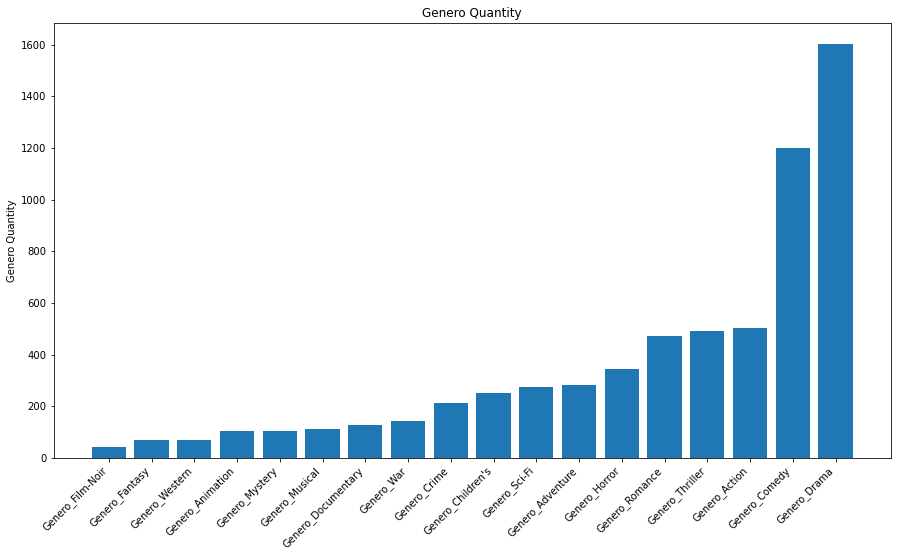

In [27]:
plt.figure(figsize=(15,8))
xticklabels = list(gen_quant.index)
plt.bar(names, values)
plt.title('Genero Quantity')
plt.ylabel('Genero Quantity')
plt.xticks(xticklabels, rotation = 45, ha="right");

## Number of Genres of Films Over the Decades 

I was chosen the top 3 of genres: Action,Comedy and Drama. Here we can follow how their frequancy change over the years.

## 20's

<AxesSubplot:xlabel='year'>

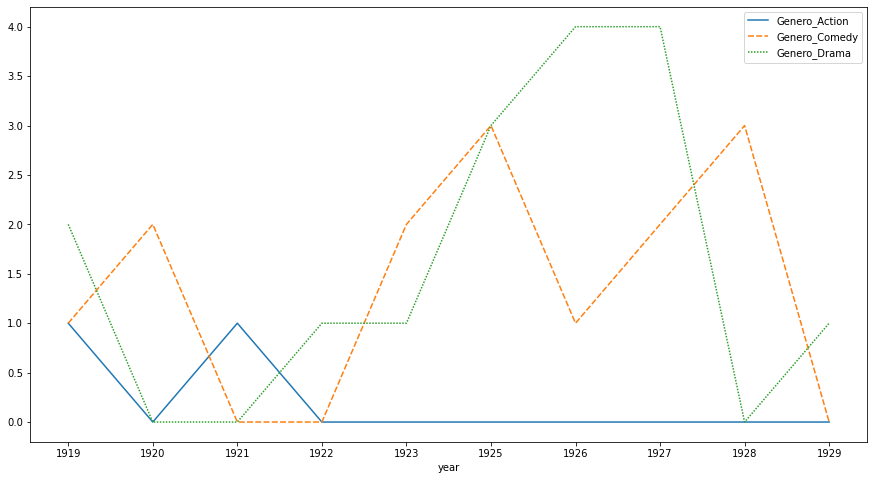

In [17]:
plt.figure(figsize=(15,8))
sns.lineplot(data=gen_year.iloc[0:10,[0, 4, 7]])

## 30's

<AxesSubplot:xlabel='year'>

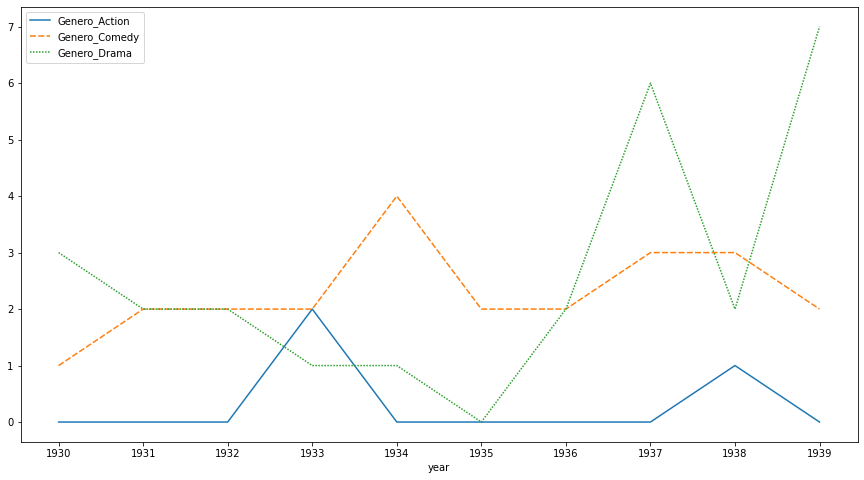

In [18]:
plt.figure(figsize=(15,8))
sns.lineplot(data=gen_year.iloc[10:20,[0, 4, 7]])

## 40's

<AxesSubplot:xlabel='year'>

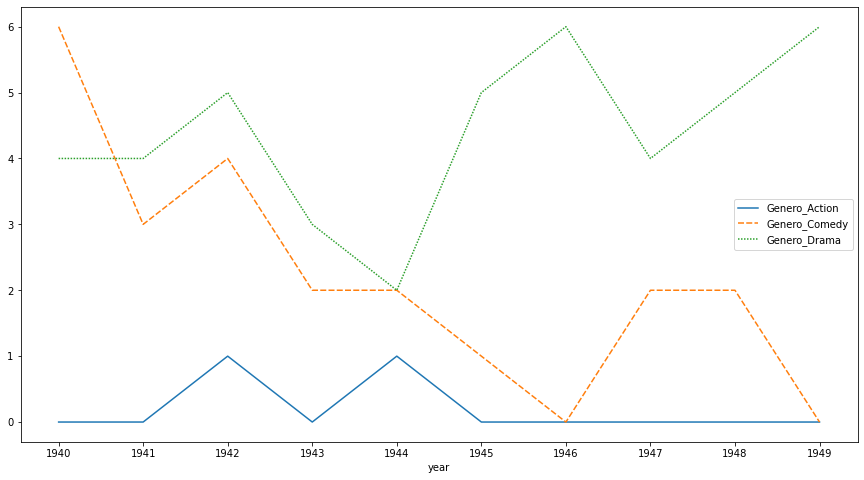

In [19]:
plt.figure(figsize=(15,8))
sns.lineplot(data=gen_year.iloc[20:30,[0, 4, 7]])

## 50's

<AxesSubplot:xlabel='year'>

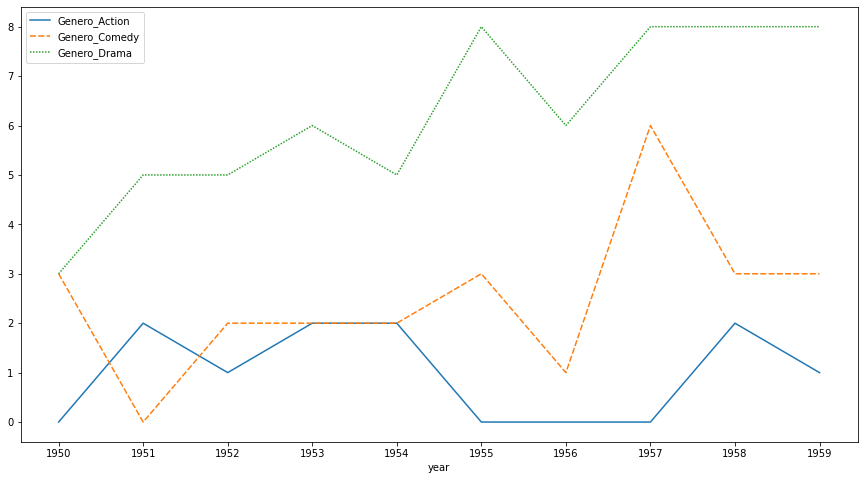

In [20]:
plt.figure(figsize=(15,8))
sns.lineplot(data=gen_year.iloc[30:40,[0, 4, 7]])

## 60's

<AxesSubplot:xlabel='year'>

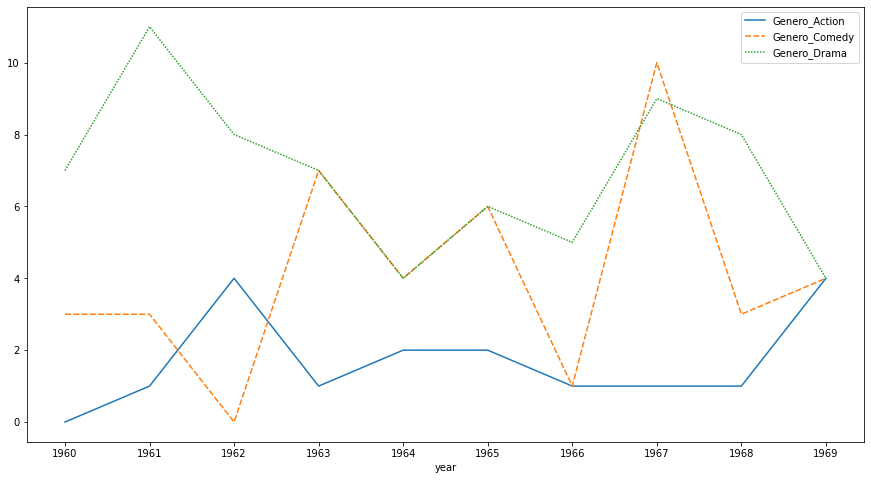

In [21]:
plt.figure(figsize=(15,8))
sns.lineplot(data=gen_year.iloc[40:50,[0, 4, 7]])

## 70's

<AxesSubplot:xlabel='year'>

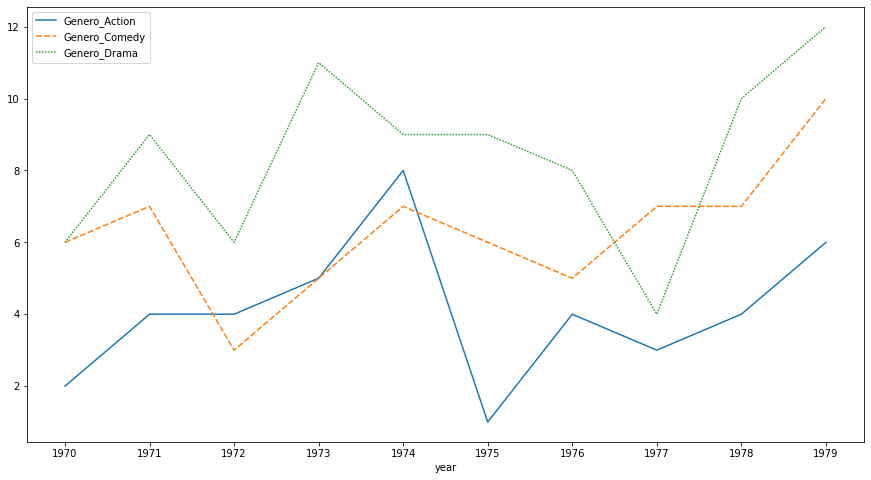

In [22]:
plt.figure(figsize=(15,8))
sns.lineplot(data=gen_year.iloc[50:60,[0, 4, 7]])

## 80's

<AxesSubplot:xlabel='year'>

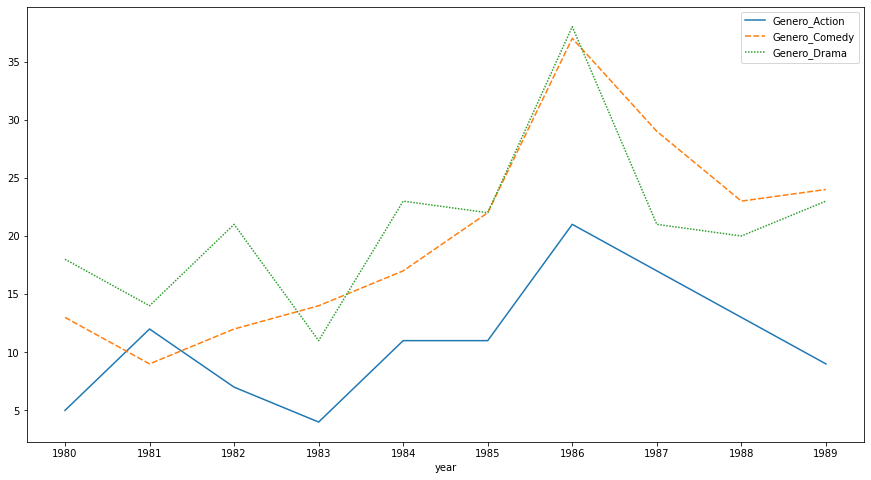

In [23]:
plt.figure(figsize=(15,8))
sns.lineplot(data=gen_year.iloc[60:70,[0, 4, 7]])

## 90's

<AxesSubplot:xlabel='year'>

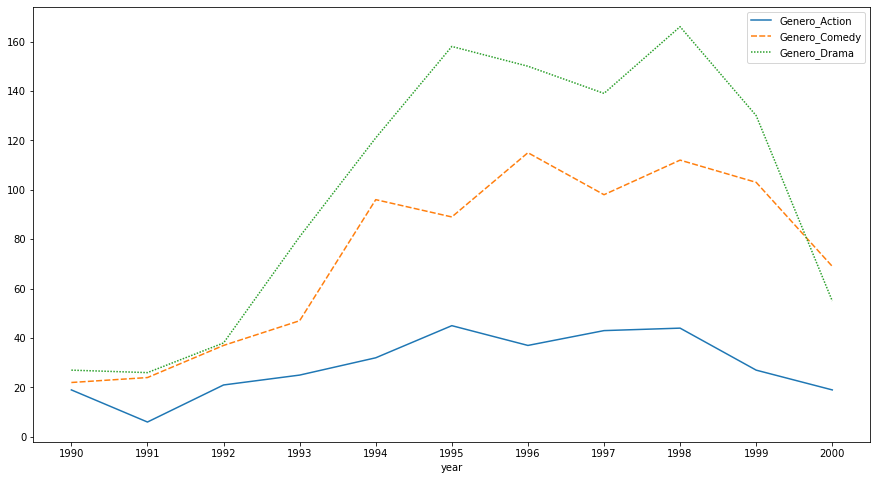

In [24]:
plt.figure(figsize=(15,8))
sns.lineplot(data=gen_year.iloc[70:,[0, 4, 7]])